FMNISTWithPytorch


Fashion MNIST, often abbreviated as FMNIST, is a popular dataset designed for benchmarking machine learning algorithms in the context of multi-class classification tasks. 

This lab enhancement focuses on addressing the FashionMNIST dataset, a widely recognized multi-class classification problem in the field of machine learning. The primary objective is to explore and develop a computer vision neural network capable of accurately identifying and categorizing various styles of clothing represented in the dataset. By delving into this problem, we aim to understand the process of building, training, and evaluating neural network architectures tailored for image classification tasks. The lab enhancement explores three different types of models: the baseline model featuring linear layers, Model 2, which builds on the baseline by adding a ReLU activation layer, and Model 3, a convolutional neural network (CNN). Additionally, you'll gain hands-on experience with PyTorch, learning to utilize its libraries for various tasks, such as transforming tensors, loading datasets, leveraging nn.Module to build models, and using it for evaluation and predictions.

### Table Of Contents
- 1.0 Install and Import Libraries
- 2.0 Load Datasets
- 3.0 Data Visualization
- 4.0 DataLoader
- 5.0 Model 0: Baseline Model
   - 5.1 Setup loss, optimizer and evaluation metrics
   - 5.2 Pytorch Training loop
   - 5.2 Pytorch Testing loop
- 6.0 Model 1: Non-linearity Model
- 7.0 Model 2: Convolutional Neural Network (CNN)
    - 7.1 Understand Convolutional layer
    - 7.2 Understand Max Pooling layer
- 8.0 Model Evaluation
- 9.0 Make Predictions

## 1.0 Install and Import Libraries

We will begin by importing the PyTorch library along with the necessary libraries for building and training our model.

In [1]:
# Run the command below to install Pytorch

# pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# pip install tqdm

In [2]:
# Run the command below if you are working in google colab

# from google.colab import drive
# import os

# drive.mount('/content/drive')

In [3]:
import torch
import torchvision
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import pandas as pd
import random

# tqdm for progress bar
from tqdm.auto import tqdm

## 2.0 Load Datasets

Pytorch has a bunch of computer vision datasets stored in `torchvision.datasets`, including FashionMNIST in `torchvision.datasets.FashionMNIST()`
We would start by download the train and test data, the following parameters are used to download the data:
- `root: str` - which folder do we want to download the data to?
- `train: Bool` - do we want the train or test split
- `download: Bool` - should the data be downloaded
- `transform: torchvision.transforms` - what transformations would you like to do on the data


In [4]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Let's take a look at the shape of the image

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

We could observe that the dataset contains a large tensor of values that ultimately map to a single target value (the label). Let’s examine the shape of the image tensor.

In [6]:
image.shape

torch.Size([1, 28, 28])

Notice that the shape of the image tensor is [1, 28, 28], each of them represents `CHW (Color Channels, Height, Width)`. 1 is the color channels, 28 is the height and width. Having `color_channels=1` means the image is in grayscale, if the color_channels=3, the image comes in rgb color, with the pixel values for red, green and blue.

Let's check out on more shapes of the data.

In [7]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

So it contains 60,000 training samples and 10,000 testing samples. 
Let's take a look at how many classes are there with the `.classes` attribute

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Notice that there are 10 different kind of clothes, because it contains more than 2 classes, this means that we are working with a multi-class classification problem.

## 3.0 Data Visualization

Let's take a look at one of the image sample by visualizing our dataset.

torch.Size([1, 28, 28])


Text(0.5, 1.0, '2')

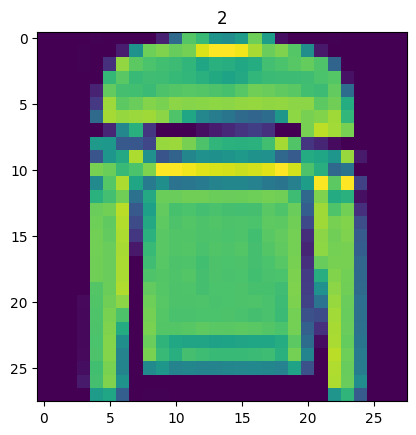

In [9]:
img, label = train_data[5]
print(img.shape)
plt.imshow(img.squeeze())
plt.title(label)

We can turn the image into grayscale using the cmap parameter of `plt.imshow()`.

Text(0.5, 1.0, 'Pullover')

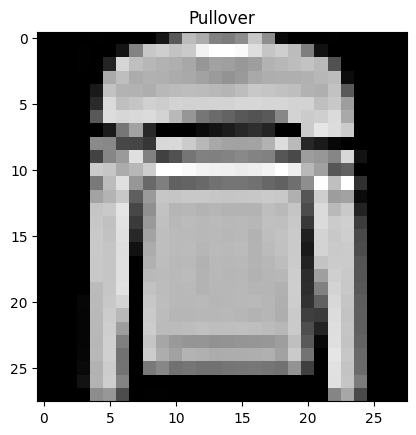

In [10]:
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])

Let's view more of them by visualizing the dataset.

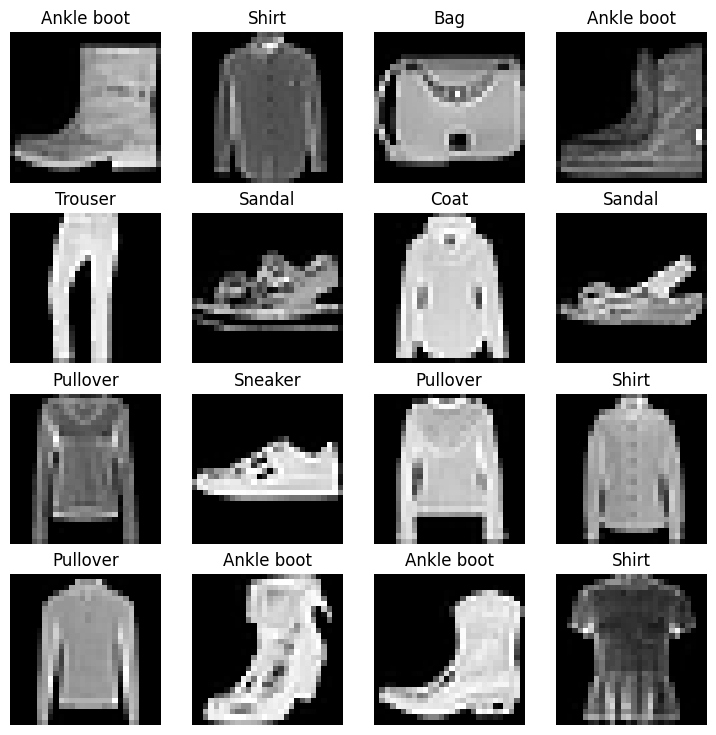

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

<a name="4"></a>
## 4.0 DataLoader

Now that we have a dataset. The next step is to utilize `torch.utils.data.DataLoader` to help load our data into the model. What a `DataLoader` does is it helps to turn a large Dataset into a Python iterable of smaller chunks. 

These chunks are called `batches` or `minibatches` and can be set by the `batch_size` parameter. The idea of breaking up into batches was to make it more computationally efficient. With `mini-batches`, gradient descent is performed more often per epoch.

A good batch size to start off with is 32. Let's create `DataLoader` for our training and test sets.

In [12]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"Length of train_dataloader: {len(train_dataloader)}")
print(f"Length of test_dataloader: {len(test_dataloader)}")

Length of train_dataloader: 1875
Length of test_dataloader: 313


Great now that we have the train and test dataloader, let's check out what is inside the training dataloader.

In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Notice that the size is in `([32, 1, 28, 28])`, representing the batch size, which is 32 in this case, color channel, height and width.

## 5.0 Model 0: Baseline model

Now its time to build our baseline model. Our baseline model will consist of 2 `nn.Linear()` layers. Because we are working with image data, we will be starting off with the `nn.Flatten()` layer. `nn.Flatten()` compresses the dimensions of a tensor into a single vector. Take a look at the code below to further understand what it does.

In [14]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


Notice how `nn.Flatten()` took our shape from [color_channels, height, width] to [color_channels, height*width]

Next, we will initialize our baseline model which:
1. Subclasses `nn.Module` and utilize `nn.Sequential` to runs in sequential order.
2. Creates 1 `nn.Flatten` as the first layer as neural networks like their inputs in vector form
3. Creates 2 `nn.Linear` layers in the constructor capable of handling input and output of shapes `X` and `y`
4. Defines a `forward()` method containing the forward pass computation of the model

In [15]:
class FMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

Now let's instatantiate a model by setting the following parameters:
- `input_shape=784` - this is how many features we've got going in the model, its one for every pixel in the target image (28 pixels * 28 pixels = 784 features)
- `hidden_units=10` - number of units/neurons in the hidden layer, this number could be whatever you want but to keep the model small we will start with 10 hidden units.
- `output_shape=len(class_names)` - since we are working with a multiclass classification problem, we need an output neuron per class in the dataset

In [16]:
torch.manual_seed(42)

model0 = FMNISTModel(input_shape=784,
                     hidden_units=10,
                     output_shape=len(class_names))

model0

FMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 5.1 Setup loss, optimizer and evaluation metrics

Next, we will setup the loss function and optimizer. If you don't know what a loss function and optimizer does, dont worry, take a look at the table below to understand whar each of them do.

| Function      | What does it do?                                                                                                               | Example                     |
|---------------|--------------------------------------------------------------------------------------------------------------------------------|-----------------------------|
| Loss function | Measures how wrong the model's predictions (e.g y_preds) are compared to the truth labels (e.g y_test). The lower the better   | `torch.nn.CrossEntropyLoss()` for cross entropy loss           |
| Optimizer     | Tells the model how to update its internal parameters to best lower the loss                                                   | `torch.optim.SGD()` for Stochastic gradient descent                   |

In our context, we will utilize:
1. CrossEntropyLoss as the loss function as it is well suited for multiclass classification problem. It effectively measures how well the model's predictions align with the actual target classes.
2. Stohastic Gradient Descent (SGD) as the optimizer to update the model's parameters iteratively based on the calculated gradients from the loss function. SGD is a fundamental optimization algorithm known for its simplicity and effectiveness in handling large datasets. 

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

Now lets create an evaluation metric. An evaluation metric can be used to offer another perspective on how our model is going. There are several evaluation metrics that can be used for classification problems but in this lab, we will be utilizing accuracy as the metric. Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions. For example, a model that makes 5 out of 100 will have an accuracy of 5%.

In [18]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### 5.2 Pytorch training loop

Now its time to create a training loop and a testing loop to train and evaluate the model. We will put them in functions as we will be calling them again and again below with another tuned model. For training loop, we will create a function called `train_step()` which takes in a model, a DataLoader, a loss function and an optimizer.

For the training steps, we typically include:
1. Forward pass - The model goes through all of the training data once, performing its `forward()` function calculations.
2. Calculate the loss - The model's outputs are compared to the groud truth and evaluated to see how wrong they are.
3. Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.
4. Perform backpropogation on the loss - Computes the gradient of the loss with respect for every model paramater to be updated (each parameter with `requires_grad=True`). This is known as backpropogation, hence "backwards".
5. Update the optimizer (gradient descent) - Update the paramaters with `requires_grad=True` with respect to the loss gradients in order to improve them.

In [19]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

Next, we will initialize the testing loop. Testing loop will be similar but it will be called `test_step()` and it will take in a model, a DataLoader,a loss function and an evaluation function.

### 5.3 Pytorch testing loop
For the testing steps, we typically include:
1. Forward pass - The model goes through all of the testing data once, performing its `forward()` function calculations.
2. Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.
3. Calculate evaluation metrics(e.g accuracy) - Alongside the loss value we may want to calculate other evaluation metrics such as accuracy on the test set.

In [20]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode(): 
        for X, y in data_loader:
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1)
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

With our training and testing functions ready, we can now execute the model training and evaluation process. For the time being, we will limit the process to 5 epochs to balance computational resources and training time, as running more epochs would significantly increase both. During each epoch, the model will go through a complete training step followed by a testing step to evaluate its performance on the dataset.

Our training loop looks like this:

1. Loop through epochs. And since we're computing on batches of data, our loss and evaluation metrics will be calculated per batch rather than across the whole dataset.
2. Loop through training batches, perform training steps, calculate train loss per batch
3. Loop through testing batches, perform testing steps, calculate the test loss per batch

In [21]:
torch.manual_seed(42)
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    
    train_step(data_loader=train_dataloader, 
        model=model0, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    
    test_step(data_loader=test_dataloader,
        model=model0,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59039 | Train accuracy: 79.17%
Test loss: 0.50954 | Test accuracy: 82.04%

Epoch: 1
-------
Train loss: 0.47633 | Train accuracy: 83.32%
Test loss: 0.47989 | Test accuracy: 83.20%

Epoch: 2
-------
Train loss: 0.45503 | Train accuracy: 84.05%
Test loss: 0.47664 | Test accuracy: 83.43%

Epoch: 3
-------
Train loss: 0.44251 | Train accuracy: 84.47%
Test loss: 0.46306 | Test accuracy: 83.75%

Epoch: 4
-------
Train loss: 0.43582 | Train accuracy: 84.70%
Test loss: 0.46869 | Test accuracy: 83.27%



Our baseline model did quite well, with a training accuracy of 84.70% and a test accuracy of 83.27%. Let's proceed to finetune the second model.

## 6.0 Model 1: Non-linearity Model

Now let's optimize our second model with Non linearity. We will do so by creating a similar model as before, except that we will put non-linear functions `nn.ReLU()` in between each layer. ReLU applies much-needed non-linearity into the model. Non-linearity is necessary to produce non-linear decision boundaries, so that the output cannot be written as a linear combination of the inputs.

In [22]:
class FMNISTModel1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

We will instatiate it with the same settings we used before, with an input shape of 784, which equals to the number of features of our image data, hidden_units of 10, and output shape with the length of class names (one output unit per class). 

In [23]:
torch.manual_seed(42)
model1 = FMNISTModel1(input_shape=784, hidden_units=10, output_shape=len(class_names))
model1

FMNISTModel1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

Next, we will train our updated model using the same training and testing loop as before with 5 epochs. We will reuse the evaluation metric to ensure consistency in our approach. Let's initialize our loss function and optimizer again with our second model.

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [25]:
torch.manual_seed(42)
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Epoch: 3
---------
Train loss: 0.64384 | Train accuracy: 76.52%
Test loss: 0.65079 | Test accuracy: 76.13%

Epoch: 4
---------
Train loss: 0.62892 | Train accuracy: 77.00%
Test loss: 0.65277 | Test accuracy: 75.95%



Seems like adding non linearities to model 1 made it perform worse than the baseline model, with a training accuracy of 77% and test accuracy of 76%. There is a possibility that the model might overfit on the training and testing data. Overfit means that the model is learning the training data well but those patterns arent generalizing to the test data.

## 7.0 Model 2: Convolutional Neural Network (CNN)

Now its time to dive deeper into our 3rd model, CNN. Convolutional neural network, CNN for short, is a type of classifier which can be used to recognize patterns in data. They are known to find patterns in visual data. If you would like to learn more abour what a CNN is, checkout this [website](https://poloclub.github.io/cnn-explainer/) that I personally recommend for more information. A convolutional neural network typically contains 4 or more layers:

1. Input layer - represents the RGB input image into the CNN. The input layer typically contains 3 channels, corresponding to the red, green and blue channels

2. Convolutional layer - they contain the learned kernels (weights), which extract features that distinguish different images from one another, this is represented by `nn.Conv2d()` in Pytorch. If you don't understand what a convolutional layer is, dont worry, we will dive deeper into how convolutional layer works below.

3. ReLU activation layer - ReLU applies much needed non-linearity into the model as non-linearity is necessary to produce non-linear decision boundaries, so that the output cannot be written as a linear combination of the inputs.

4. Pooling layer - Pooling layer gradually decreases the spatial extent of the network, which reduces the parameters and overall computation of the network. The architecture below uses a 2x2 kernel and a stride of 2, which is represented by `nn.MaxPool2d()`.

Model 2 initializes 2 sequential blocks alongside with another sequential block for classifying the images

In [26]:
class FMNISTModel2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=1,
                     stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )
    def forward(self, x: torch.Tensor):
        x = self.block1(x)
        x = self.block2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
model2 = FMNISTModel2(input_shape=1, hidden_units=10, output_shape=len(class_names))
model2

FMNISTModel2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Understand Convolutional layer

Now let's understand what a convolutional layer does. The architecture above creates `nn.Conv2d()` with the following parameters:
- in_channels: Number of channels in the input image
- out_channels: Number of channels produced by the convolution
- kernel_size: Size of the convolving kernel/filter
- stride: How big of a step the convolving kernel takes at a time
- padding: Padding to all 4 sides of input. Default: 0


`nn.Conv2d()` expects a 4 dimensional tensor as input with size `(N, C, H, W)`, representing the `[batch_size, color_channels, height, width]`. We pass in a random test image withe a 4 dimensional input here, Pytorch would yields an error if we provide an input with 3 dimensional tensor. Now let's take a look on how a conv layer would looks like.

In [27]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)
images = torch.randn(size=(32, 3, 64, 64))
conv_layer(images).shape

torch.Size([32, 10, 62, 62])

Notice how when we apply convolutional layer onto the random image, the shape changes to the size `[32, 10, 62, 62]`, which represents `[batch_size=32, color_channels=10, height=62, width=62]`. What is going on here? Behind the scenes, `nn.Conv2d()` is compressing the information stored in the image. It does this by performing operations on the input against its internal parameters. Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer. The only difference is how the different layers calculate their parameter updates or in Pytorch terms, the operation present in the layer `forward()` method. We can check the weight and bias tensor that we have passed to `nn.Conv2d()`.

In [28]:
print(f"Conv layer weight shape: {conv_layer.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=3, kernel_size=3]")
print(f"Conv layer bias shape: {conv_layer.bias.shape} -> [out_channels=10]")

Conv layer weight shape: torch.Size([10, 3, 3, 3]) -> [out_channels=10, in_channels=3, kernel_size=3, kernel_size=3]
Conv layer bias shape: torch.Size([10]) -> [out_channels=10]


### 7.2 Understand Max Pooling layer

Now lets check out what happens when we move the data through a Max Pooling layer, which is nn.MaxPool2d(). 

In [29]:
test_image = images[0] # get a single image for testing

# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through max_pool_layer(): {test_image_through_maxpool.shape}")

Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through max_pool_layer(): torch.Size([1, 10, 31, 31])


Notice the change in shape after passing through the MaxPool layer. The shape halves from a `62x62` image size to a `31x31` image size. Now let's see the work with a smaller tensor. In essence, they get halved. This is the whole idea of a `nn.MaxPool2d()` layer, it takes the maximum value from a portion of a tensor and disregard the rest.

Taking from the knowledge we gain from convolutional layer and the max pooling layer. We got the conclusion that every layer in the neural network is trying to compress data from a high dimensional space to a lower dimensional space. In other words, it takes a lot of numbers (raw data) and learn patterns in those numbers.

Next, let's setup the loss function and optimizer for model 2.

In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(), lr=0.1)

Following on, we will train and test our model2 with the training and test functions that we have initialize above with 5 epochs.

In [31]:
torch.manual_seed(42)
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59563 | Train accuracy: 78.40%
Test loss: 0.39714 | Test accuracy: 85.65%

Epoch: 1
---------
Train loss: 0.36179 | Train accuracy: 87.09%
Test loss: 0.35345 | Test accuracy: 86.96%

Epoch: 2
---------
Train loss: 0.32441 | Train accuracy: 88.30%
Test loss: 0.32050 | Test accuracy: 88.40%

Epoch: 3
---------
Train loss: 0.30294 | Train accuracy: 89.05%
Test loss: 0.32943 | Test accuracy: 87.97%

Epoch: 4
---------
Train loss: 0.28908 | Train accuracy: 89.48%
Test loss: 0.30385 | Test accuracy: 88.95%



Our CNN model did quite well compared to the 2nd model above, with a training accuracy of 89.48% and a test accuracy of 88.95%.

## 8.0 Model Evaluation

Now its time to evaluate 3 of the models that we have instantiate above. We will create a function to evaluate the models predictions on the given dataset. The function below will use the model to make predictions on the data and then evaluate those predictions using the loss function and accuracy function. It will takes in the parameters here:

1. model (torch.nn.Module): A Pytorch model capable of making predictions on data_loader.
2. data_loader (torch.utils.data.DataLoader): The target dataset to predict on
3. loss_fn (torch.nn.Module): the loss function of model
4. accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

In [32]:
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

We have trained with 3 different models.
1. model0 - our baseline model with 2 `nn.Linear()` layers
2. model1 - the same setup with our baseline model except with `nn.ReLU()` layers in between the linear layers.
3. model2 - CNN model with convolutional layer and max pooling layer.

Let's run through the evaluation function to see how well each of the model performs.

In [33]:
# Calculate model 0 results on test dataset
model0_results = eval_model(model=model0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model0_results

{'model_name': 'FMNISTModel',
 'model_loss': 0.4686937928199768,
 'model_acc': 83.2667731629393}

In [34]:
# Calculate model 1 results on test dataset
model1_results = eval_model(model=model1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model1_results

{'model_name': 'FMNISTModel1',
 'model_loss': 0.6527653932571411,
 'model_acc': 75.94848242811501}

In [35]:
# Calculate model 2 results on test dataset
model2_results = eval_model(model=model2, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model2_results

{'model_name': 'FMNISTModel2',
 'model_loss': 0.3038463592529297,
 'model_acc': 88.9476837060703}

Let's combine our model performance into a dataframe and find out which model performs the best.

In [36]:
results = pd.DataFrame([model0_results, model1_results, model2_results])
results

,model_name,model_loss,model_acc
0,FMNISTModel,0.468694,83.266773
1,FMNISTModel1,0.652765,75.948482
2,FMNISTModel2,0.303846,88.947684


As we can observe, our CNN Model(FMNISTModel2) performs the best as it has the highest accuracy and the lowest loss. In contrast, the second model performs the worst with the lowest accuracy. Now let's visualize our model results. 

Text(0, 0.5, 'model')

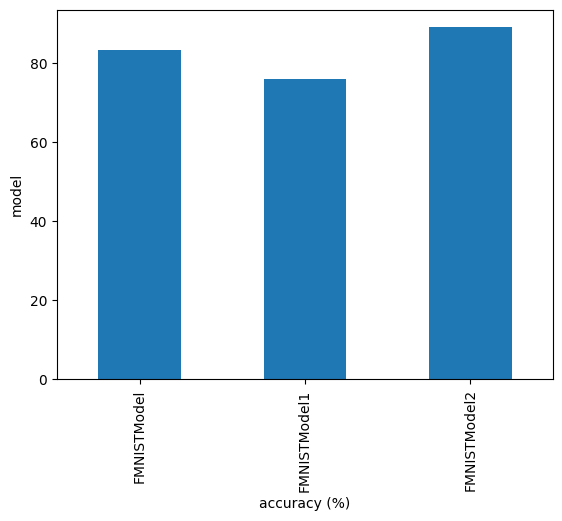

In [37]:
results.set_index("model_name")["model_acc"].plot(kind="bar")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9.0 Make Predictions

Now that we have compared our models to each other, let's further evaluate our best performing model which is the secind model. To do so, we create a function `make_predictions()` where we can pass the model and data for it to predict on. 

This function processes each data sample individually, performs a forward pass through the model, and converts the raw output logits into probabilities using the softmax function. By doing this, we ensure that the outputs are interpretable as probabilities, which can then be used for further analysis or decision-making. Finally, the function stacks all the prediction probabilities into a single tensor, making the results easier to handle and analyze collectively.

In [38]:
def make_predictions(model: torch.nn.Module, data: list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0)

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob)
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [39]:
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 8 (Bag)


And now we can go from prediction labels by taking the `torch.argmax()` of the output of the `torch.softmax()` activation function.

In [40]:
pred_probs = make_predictions(model=model2, data=test_samples)
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 6, 1, 6, 0, 3, 7, 8, 8])

In [41]:
test_labels, pred_classes

([8, 6, 1, 6, 0, 3, 7, 6, 8], tensor([8, 6, 1, 6, 0, 3, 7, 8, 8]))

Now our predicted classes are in the same format as our test labels, we can compare. Since we are dealing with image data, lets visualize and plot the predictions and images.

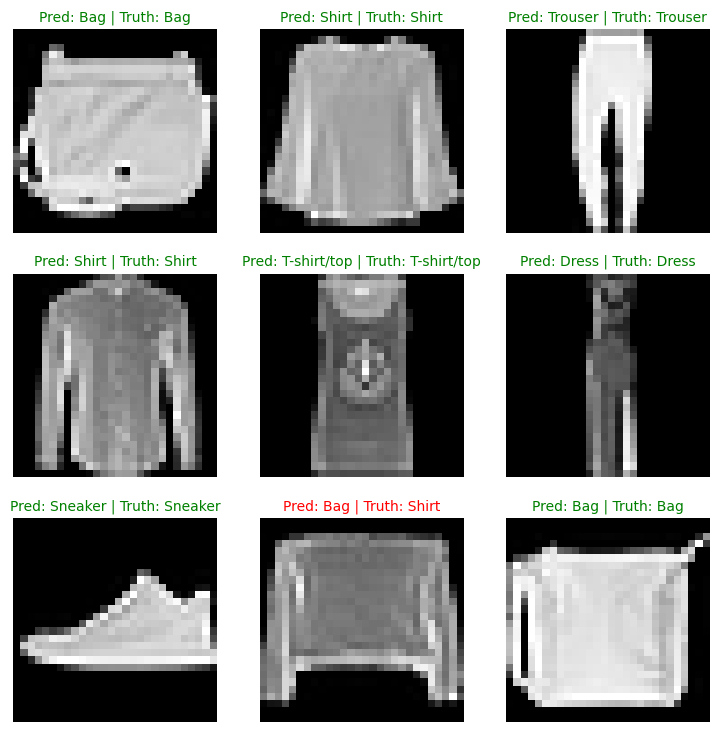

In [42]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # Find the prediction label
    pred_label = class_names[pred_classes[i]]

    # Get the truth label
    truth_label = class_names[test_labels[i]]

    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

Looks like our model is performing well here, as it correctly predicts 8 out of 9 of the classes here. You can further refine the second model by adding additional layers or increasing the number of training epochs to improve its accuracy.

## Conclusion
In conclusion, this lab enhancement provided a comprehensive exploration of the FashionMNIST dataset through the lens of machine learning and computer vision. By progressing through various models—from a baseline linear model to more advanced architectures like a convolutional neural network (CNN), we gained valuable insights into the complexities of image classification tasks. Through hands-on implementation with PyTorch, we also deepened our understanding of key concepts such as data transformation, dataset loading, and model evaluation. This structured approach not only enhanced our ability to build and train models but also emphasized the importance of iterative experimentation in achieving optimal results. These skills and learnings can serve as a foundation for tackling more complex problems in computer vision and machine learning in the future.